<a href="https://colab.research.google.com/github/subhra004/XEMPLA--project-prototype/blob/main/smart_asset_monitoring_medical_equipments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   **Smart Asset Monitoring using ML**
This notebook demonstrates a simplified version of a decision intelligence system, covering:
- Fault Detection using Isolation Forest
- Condition-Based Maintenance (CBM) via Health Score
- Energy Usage Prediction using Linear Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("sample_data.csv", parse_dates=["timestamp"])
df.set_index("timestamp", inplace=True)

# **1. Fault Detection with Isolation Forest**

```
# This is formatted as code
```



In [ ]:
features_fd = df[["temperature", "vibration"]]
scaler_fd = MinMaxScaler()
features_fd_scaled = scaler_fd.fit_transform(features_fd)

iso_forest = IsolationForest(contamination=0.03, random_state=42)
df["anomaly_score"] = iso_forest.fit_predict(features_fd_scaled)
df["anomaly"] = df["anomaly_score"].apply(lambda x: 1 if x == -1 else 0)

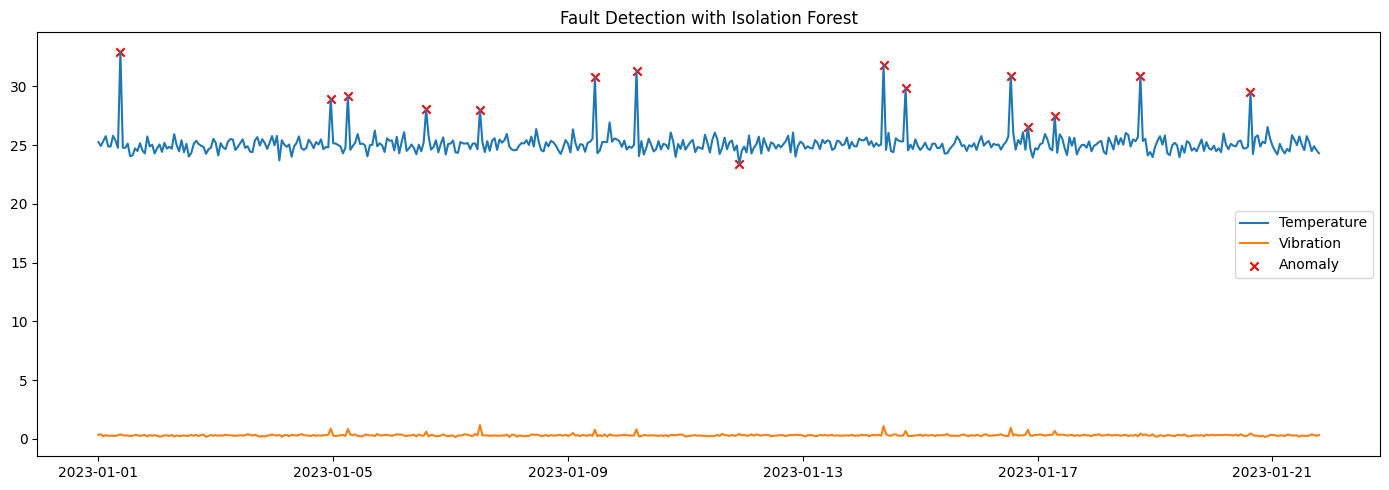

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df.index, df["temperature"], label="Temperature")
plt.plot(df.index, df["vibration"], label="Vibration")
plt.scatter(df.index[df["anomaly"] == 1], df["temperature"][df["anomaly"] == 1], color='red', label="Anomaly", marker='x')
plt.title("Fault Detection with Isolation Forest")
plt.legend()
plt.tight_layout()
plt.show()

# **2. Condition-Based Maintenance (CBM) - Health Score**

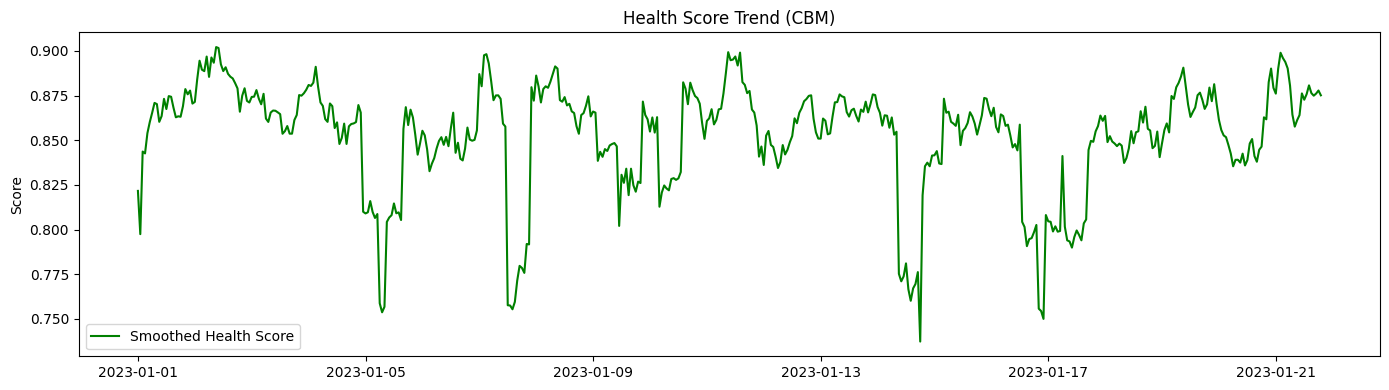

In [ ]:
scaler_cbm = MinMaxScaler()
df["vibration_norm"] = scaler_cbm.fit_transform(df[["vibration"]])
df["health_score"] = 1 - df["vibration_norm"]
df["health_score_smooth"] = df["health_score"].rolling(window=10, min_periods=1).mean()

plt.figure(figsize=(14, 4))
plt.plot(df.index, df["health_score_smooth"], label="Smoothed Health Score", color="green")
plt.title("Health Score Trend (CBM)")
plt.ylabel("Score")
plt.tight_layout()
plt.legend()
plt.show()

# **3. Energy Usage Prediction (Regression)**

In [ ]:
df["hour"] = df.index.hour
X_energy = df[["temperature", "vibration", "hour"]]
y_energy = df["energy_usage"]
model_energy = LinearRegression()
model_energy.fit(X_energy, y_energy)
df["predicted_energy"] = model_energy.predict(X_energy)

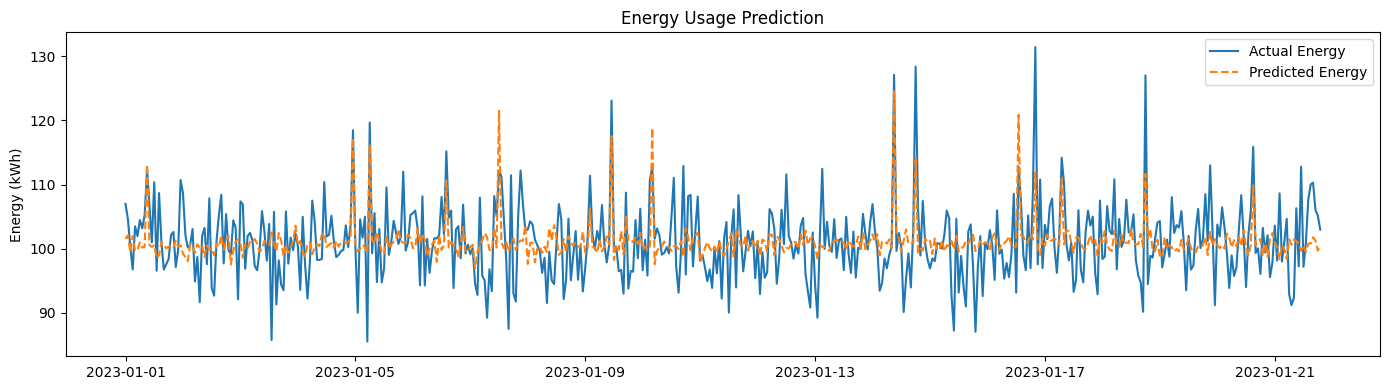

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df["energy_usage"], label="Actual Energy")
plt.plot(df.index, df["predicted_energy"], label="Predicted Energy", linestyle="--")
plt.title("Energy Usage Prediction")
plt.ylabel("Energy (kWh)")
plt.legend()
plt.tight_layout()
plt.show()